# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Window Functions

For the discussion of the leakage effect in the [previous section](leakage_effect.ipynb), a hard truncation of the signal $x[k]$ by a rectangular window $w[k] = \text{rect}_N[k]$ was assumed. Also other window functions are used for spectral analysis. The resulting properties depend on the spectrum $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of the window function, since the spectrum of the windowed signal is given as $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$. Different window functions have different properties. For instance with respect to the capability to distinguish two neighboring signals (frequency resolution) or to detect two signals where one is much weaker (sidelobe level). Since these two aspects counteract for typical window functions, the choice of a suitable window depends heavily on the application. Therefore a look is taken at frequently applied window functions and their basic properties.

In order to investigate the windows, a function is defined which computes and plots the magnitude spectrum of a given window function. The spectrum $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ is approximated numerically by the DFT.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


def dft_window_function(w):
    
    N = len(w)
    
    # DFT of window function
    W = np.fft.fft(w, 8192)
    W = np.fft.fftshift(W)
    W = W / np.amax(W) + np.nextafter(0,1)
    mu = np.linspace(-np.pi, np.pi, 8192)

    # plot window function and its spectrum
    plt.rcParams['figure.figsize'] = 10, 5
    plt.stem(w)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$w[k]$')
    plt.axis([0, N, 0, 1.1])
    plt.grid()

    plt.figure()
    plt.plot(mu, 20*np.log10(np.abs(W)))
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$| W(e^{j \Omega}) |$ in dB')
    plt.axis([-np.pi, np.pi, -100, 5])
    plt.grid()

### Rectangular Window

The [rectangular window](https://en.wikipedia.org/wiki/Window_function#Rectangular_window) $w[k] = \text{rect}_N[k]$ takes all samples with equal weight into account. The main lobe of its magnitude spectrum is narrow, but the level of the side lobes is rather high. It has the highest frequency selectivity.

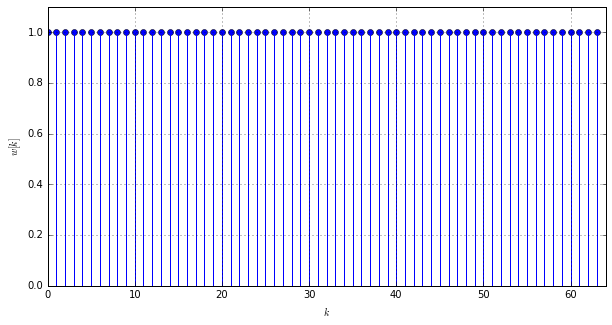

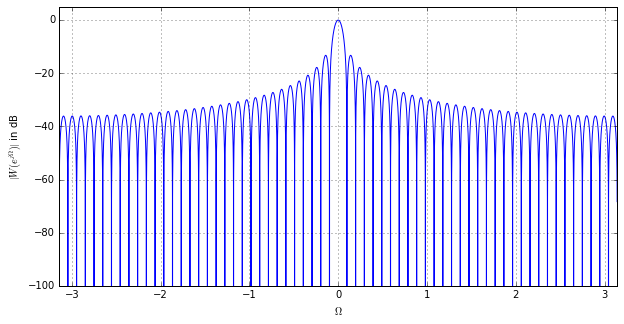

In [2]:
dft_window_function(np.ones(64))

### Triangular Window

For an odd window length $2N - 1$, the [triangular window](https://en.wikipedia.org/wiki/Window_function#Triangular_window) can be expressed as the convolution of two rectangular windows $w[k] = \text{rect}_N[k] * \text{rect}_N[k]$. The main lobe is wider as for the rectangular window, but the level of the side lobes decays faster.

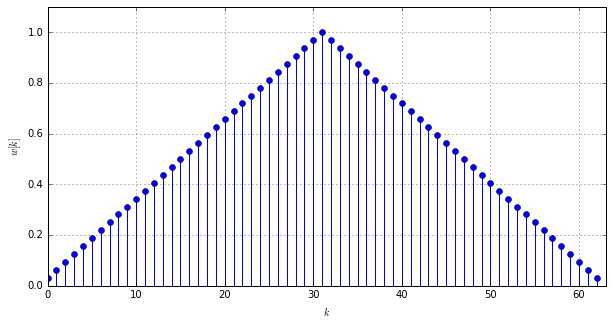

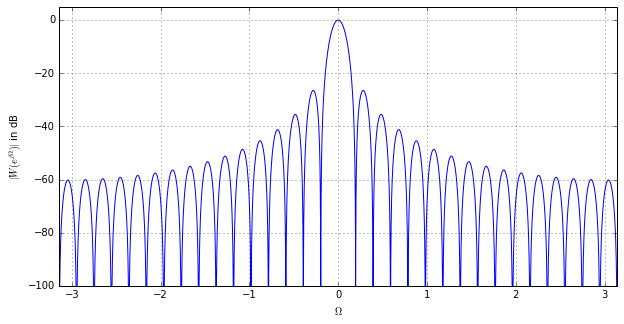

In [3]:
dft_window_function(sig.triang(63))

### Hanning Window

The [Hanning window](https://en.wikipedia.org/wiki/Window_function#Hann_.28Hanning.29_window) $w[k] = \frac{1}{2} ( 1 - \cos(2 \pi \frac{k}{N}))$ is a smooth window whose first and last value is zero. It features a fast decay of the side lobes.

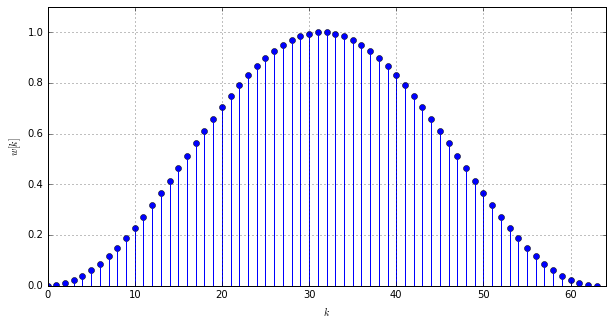

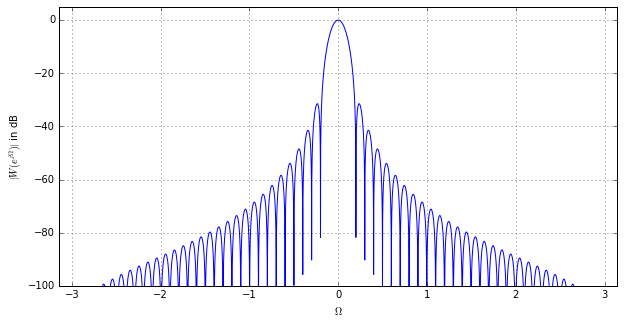

In [4]:
dft_window_function(np.hanning(64))

### Hamming Window

The [Hamming window](https://en.wikipedia.org/wiki/Window_function#Hamming_window) $w[k] =  0.54 - 0.46 \cos(2 \pi \frac{k}{N})$ is a smooth window function whose first and last value is not zero. The level of the side lobes is approximately constant.

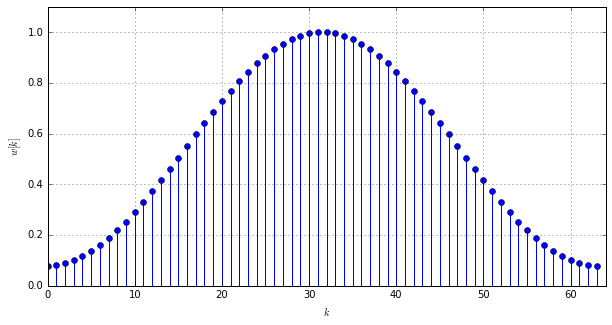

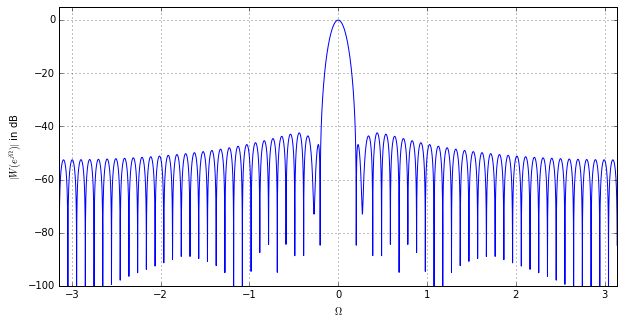

In [5]:
dft_window_function(np.hamming(64))

### Blackman Window

The [Blackman window](https://en.wikipedia.org/wiki/Window_function#Blackman_windows) $w[k] =  0.42 - 0.5 \cos(2 \pi \frac{k}{N}) + 0.08 \cos(4 \pi \frac{k}{N})$ features a rapid decay of side lobes at the cost of a wide main lobe and low frequency selectivity.

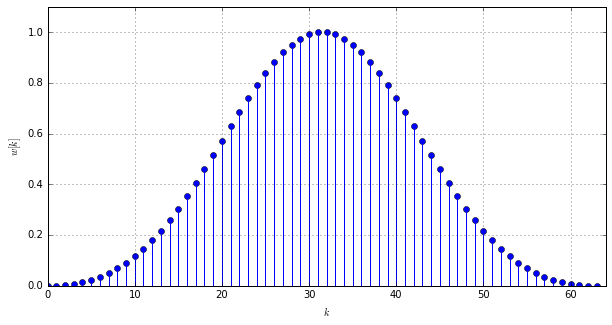

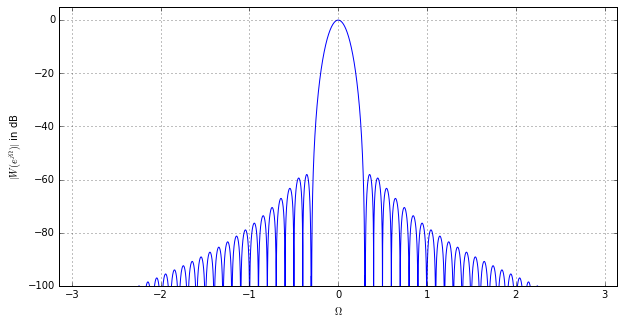

In [6]:
dft_window_function(np.blackman(64))

### Analysis of Signal Mixtures by the Windowed Discrete Fourier Transformation

The analysis of signal mixtures by the windowed DFT is illustrated by numerical examples. For this purpose, the function for the analysis of a [superposition of two exponential signals from the previous section](leakage_effect.ipynb#Analysis-of-signal-mixtures-by-the-discrete-Fourier-transformation) is extended by windowing the signal before taking its DFT.

In [7]:
def dft_signal_mixture_window(N, A1, P1, A2, P2, w):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    # window applied to the signal
    
    # generate the signal mixture
    Om0_1 = P1*(2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2*(2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)
    x = x * w

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X))
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5]);

Now the last example is re-investigated by using a Blackman window which features a high suppression of the sidelobes.

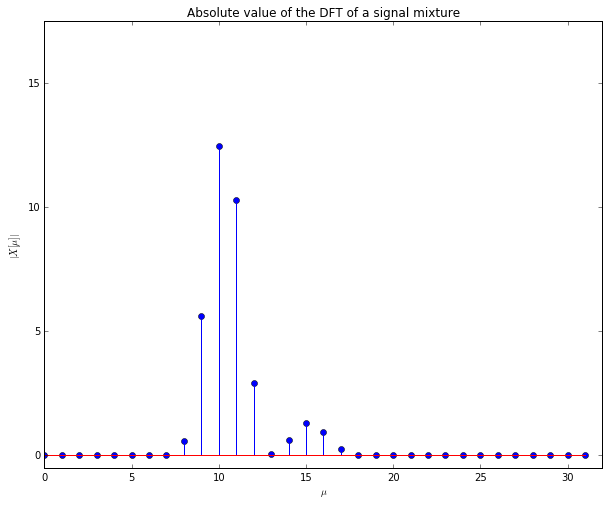

In [8]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.blackman(32))

The second exponential signal with the lower level now becomes visible in the spectrum.

**Exercise**

* Examine the effect of the other window functions for small/large frequency and level differences. What window function is best suited for what situation?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.